In [1]:
import pandas as pd 
import numpy as np 
import json 
from dataclasses import dataclass 
import matplotlib.pyplot as plt



In [2]:
@dataclass 
class ProbeResult:
    model_setting_name: str
    data_point: int
    setting: str
    layer: int
    mae: float
    mse: float
    correlation: float


In [3]:
data_points = [100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 9500]
settings = ['string', 'int']

probe_results = []

for data_point in data_points:
    for setting in settings:
        model_setting_name = f'llama-3.1-8b-instruct_regression_{setting}'
        with open(f'../probes/{data_point}/{model_setting_name}/results.json', 'r') as f:
            results = json.load(f)
        
        for layer in results['training_results']:
            layer_result = ProbeResult(model_setting_name, data_point, setting, layer['layer'], layer['mae'], layer['mse'], layer['correlation'])
            probe_results.append(layer_result)
        
df = pd.DataFrame(probe_results)

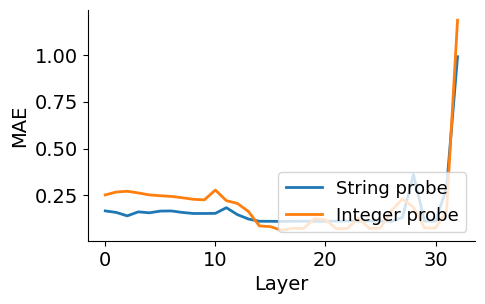

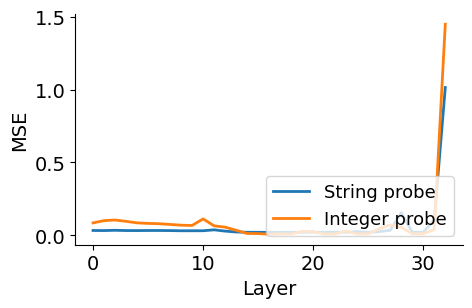

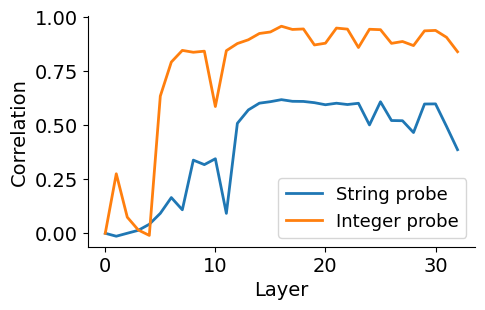

In [4]:
# plot results of probe based on the layer 
# x-axis: layer
# y-axis: optional parameter (mae, mse, correlation)
# we will have two lines, one for string and one for int

# loop over these and plot all 
y_axis_metrics = ['mae', 'mse', 'correlation']
legend_mapping = {'string': 'String probe', 'int': 'Integer probe'}
y_axis_labels = {'mae': 'MAE', 'mse': 'MSE', 'correlation': 'Correlation'}
for y_axis in y_axis_metrics:
    
    layer_results = df[df['data_point'] == data_points[-1]]
    layer_results = layer_results.fillna(0)

    fig, ax = plt.subplots(figsize=(5,3))
    for setting in settings:
        setting_results = layer_results[layer_results['setting'] == setting]
        ax.plot(setting_results['layer'], setting_results[y_axis], label=legend_mapping[setting], linewidth=2)

    ax.set_xlabel('Layer', fontsize=14)
    ax.set_ylabel(y_axis_labels[y_axis], fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=13, loc='lower right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(f'../visuals/probe_layer_selection_{y_axis}.pdf', dpi=300, bbox_inches='tight')
    plt.show()




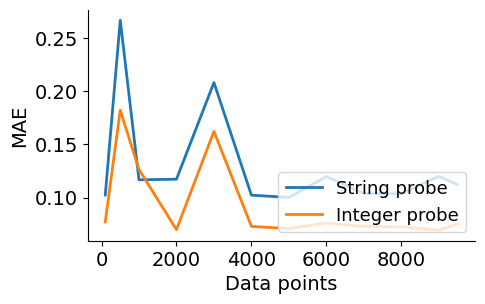

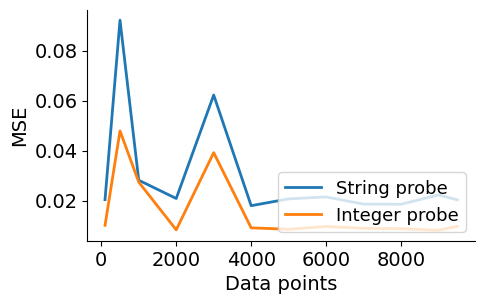

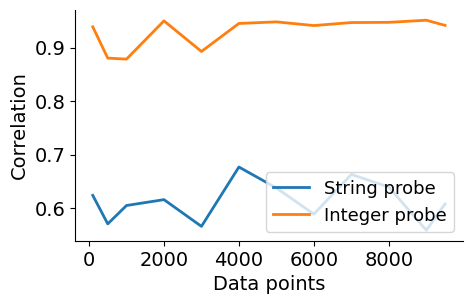

In [5]:
# plot how the metrics changes with the number of data points 
y_axis_metrics = ['mae', 'mse', 'correlation']
legend_mapping = {'string': 'String probe', 'int': 'Integer probe'}
y_axis_labels = {'mae': 'MAE', 'mse': 'MSE', 'correlation': 'Correlation'}

for y_axis in y_axis_metrics:    
    layer_results = df[df['layer'] == 25]
    layer_results = layer_results.fillna(0)

    fig, ax = plt.subplots(figsize=(5,3))
    for setting in settings:
        setting_results = layer_results[layer_results['setting'] == setting]
        ax.plot(setting_results['data_point'], setting_results[y_axis], label=legend_mapping[setting], linewidth=2)

    ax.set_xlabel('Data points', fontsize=14)
    ax.set_ylabel(y_axis_labels[y_axis], fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=13, loc='lower right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(f'../visuals/probe_data_points_{y_axis}.pdf', dpi=300, bbox_inches='tight')
    plt.show()




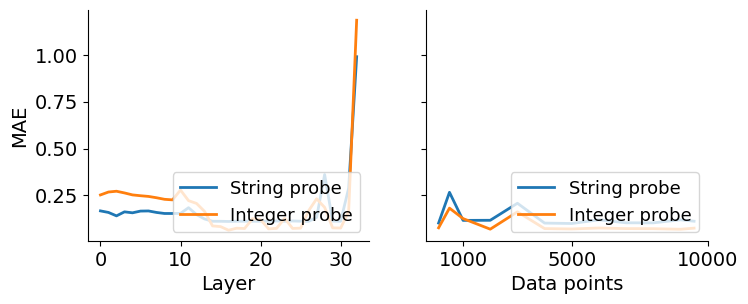

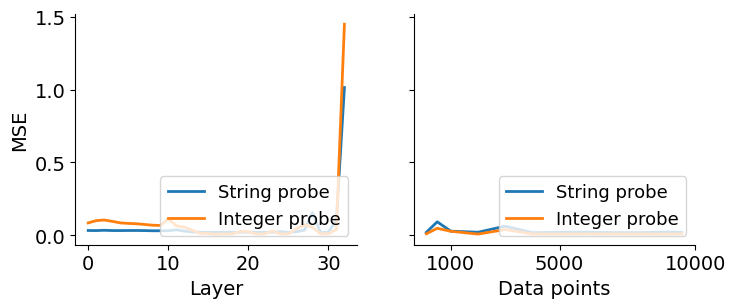

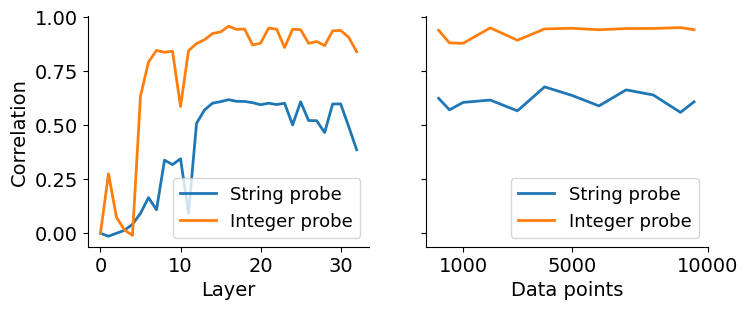

In [6]:
# plot results of probe based on the layer 
# x-axis: layer
# y-axis: optional parameter (mae, mse, correlation)
# we will have two lines, one for string and one for int

# loop over these and plot all 
y_axis_metrics = ['mae', 'mse', 'correlation']
legend_mapping = {'string': 'String probe', 'int': 'Integer probe'}
y_axis_labels = {'mae': 'MAE', 'mse': 'MSE', 'correlation': 'Correlation'}
for y_axis in y_axis_metrics:
    
    layer_results = df[df['data_point'] == data_points[-1]]
    layer_results = layer_results.fillna(0)

    fig, (ax, ax2) = plt.subplots(1,2,figsize=(8,3), sharey=True)
    for setting in settings:
        setting_results = layer_results[layer_results['setting'] == setting]
        ax.plot(setting_results['layer'], setting_results[y_axis], label=legend_mapping[setting], linewidth=2)

    ax.set_xlabel('Layer', fontsize=14)
    ax.set_ylabel(y_axis_labels[y_axis], fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=13, loc='lower right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    layer_results = df[df['layer'] == 25]
    layer_results = layer_results.fillna(0)

    for setting in settings:
        setting_results = layer_results[layer_results['setting'] == setting]
        ax2.plot(setting_results['data_point'], setting_results[y_axis], label=legend_mapping[setting], linewidth=2)

    ax2.set_xlabel('Data points', fontsize=14)
    # ax2.set_ylabel(y_axis_labels[y_axis], fontsize=14)
    ax2.tick_params(axis='both', labelsize=14)
    # set ticks for [1000, 5000, 10000]
    ax2.set_xticks([1000, 5000, 10000])
    ax2.legend(fontsize=13, loc='lower right')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    plt.savefig(f'../visuals/probe_combined_{y_axis}.pdf', dpi=300, bbox_inches='tight')
    plt.show()




